In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [51]:
df = pd.read_csv("covid_19_data.csv")
df.shape

(4513, 8)

In [79]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

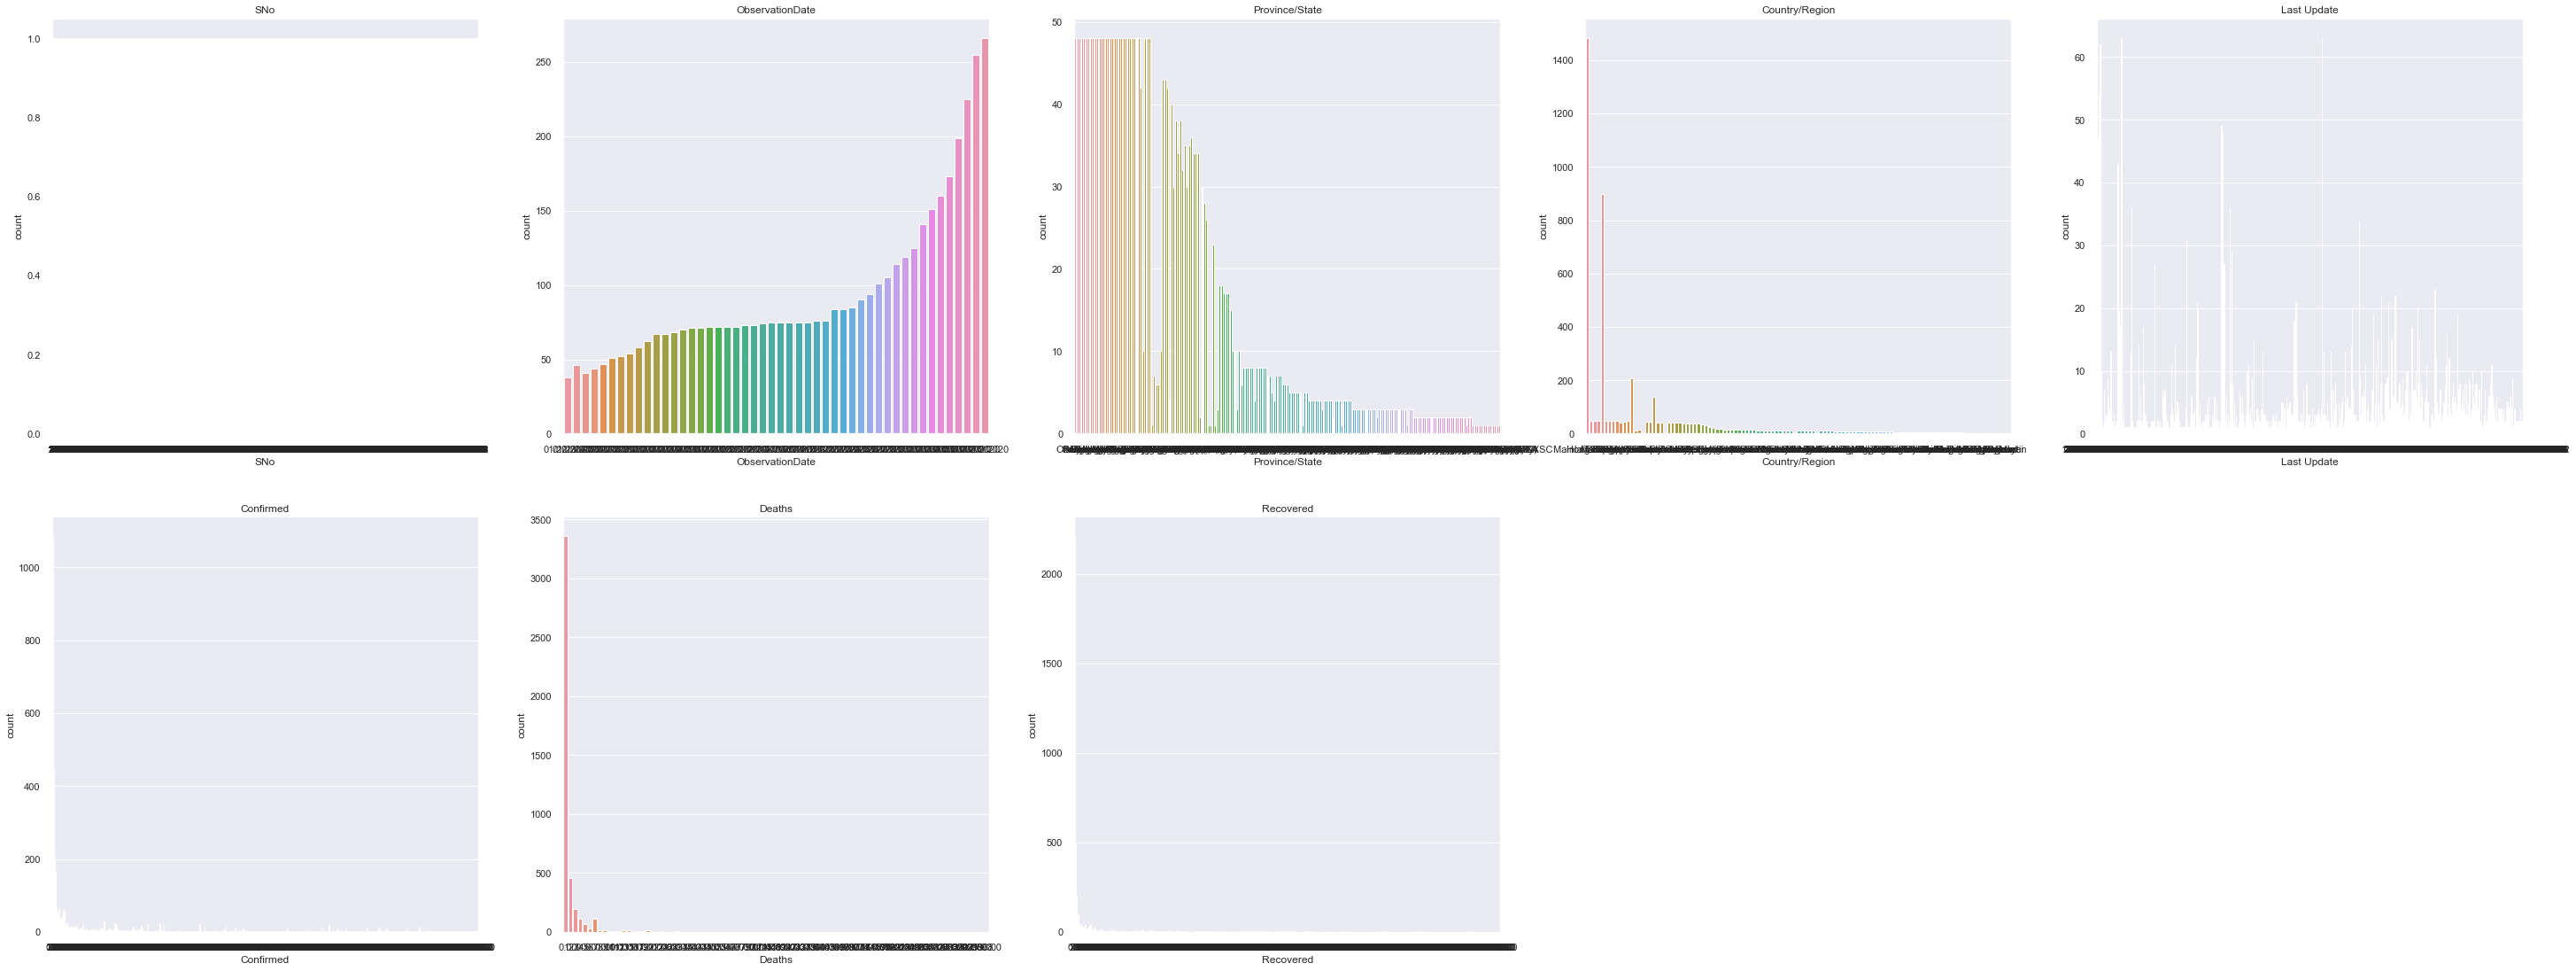

In [92]:
features = df.columns

plt.figure(figsize=(50,50))
for i in range(0, len(features)):
    plt.subplot(5, 5, i + 1)
    sns.countplot(df[features[i]])
    plt.title(features[i])
plt.show()

In [53]:
df['Confirmed'].describe()

count     4513.000000
mean       577.460891
std       4989.693765
min          0.000000
25%          1.000000
50%          8.000000
75%         93.000000
max      67743.000000
Name: Confirmed, dtype: float64

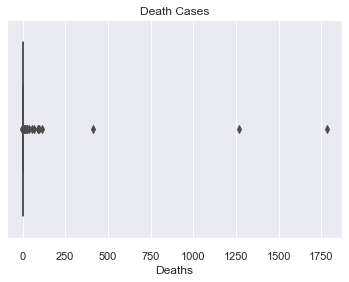

In [86]:
sns.set()
plt.title('Death Cases')
sns.boxplot(country_sums['Deaths'])
plt.show()

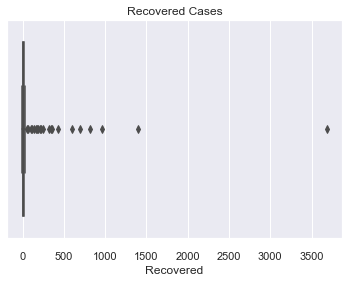

In [85]:
sns.set()
plt.title('Recovered Cases')
sns.boxplot(country_sums['Recovered'])
plt.show()

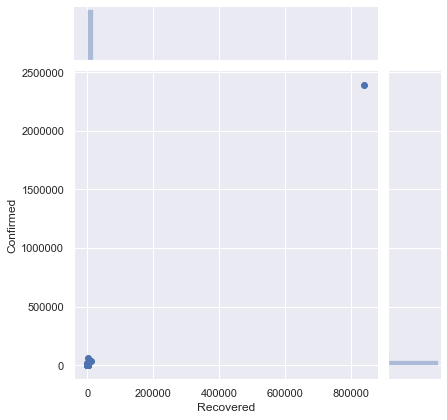

In [33]:
sns.jointplot(x="Recovered", y="Confirmed", data=country_sums)

In [56]:
country_sums = df.groupby('Country/Region').sum()

In [57]:
country_sums.describe()

,SNo,Confirmed,Deaths,Recovered
count,1.150000e+02,1.150000e+02,115.000000,115.000000
mean,8.857253e+04,2.266157e+04,682.147826,7483.347826
std,3.308445e+05,2.231046e+05,6929.975512,78275.477853
min,2.650000e+02,1.000000e+00,0.000000,0.000000
25%,2.130050e+04,9.000000e+00,0.000000,0.000000
50%,3.738600e+04,4.800000e+01,0.000000,0.000000
75%,6.832550e+04,4.070000e+02,0.000000,24.000000
max,2.646145e+06,2.392787e+06,74319.000000,839533.000000


In [61]:
def something(x):
    if ( x > 7000):
        return -1
    else:
        return x

In [62]:
country_sums['Deaths'] = country_sums['Deaths'].apply(something)

In [64]:
country_sums['Recovered'] = country_sums['Recovered'].apply(something)

In [59]:
country_sums['Recovered']['US']

158.0

In [50]:
max(country_sums['Deaths'])
for i in country_sums['Deaths']:
    print(i)

0.0
0.0
0.0
0.0
0.0
2.0
0.0
19.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
96.0
0.0
0.0
2.0
0.0
0.0
57.0
0.0
0.0
0.0
0.0
1267.0
23.0
0.0
0.0
1781.0
0.0
93.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
74319.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
89.0
0.0
0.0
0.0
0.0
37.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
415.0
66.0
0.0
0.0
0.0
7.0
23.0
9.0
0.0
0.0
12.0
112.0
0.0
0.0
0.0
0.0


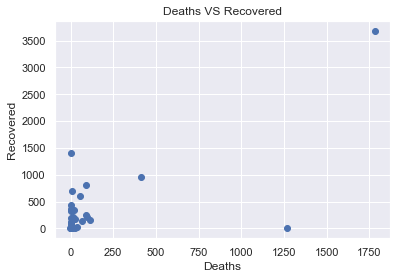

In [72]:
plt.scatter(country_sums['Deaths'], country_sums['Recovered'])
plt.title('Deaths VS Recovered')
plt.xlabel('Deaths')
plt.ylabel('Recovered')
plt.show()

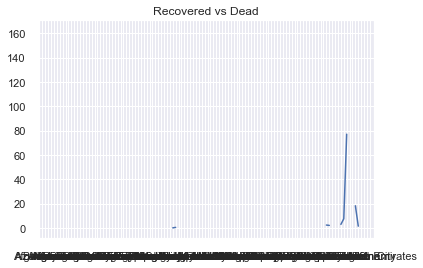

In [89]:
plt.plot(country_sums['r_over_d'])
plt.title('Recovered vs Dead')
plt.show()

In [66]:
deaths = country_sums['Deaths']
recovered = country_sums['Recovered']

In [69]:
avg_death = sum(deaths) / len(deaths)
avg_recovered = sum(recovered) / len(recovered)

In [78]:
sum(deaths) / (sum(recovered) + sum(deaths))

0.2624483306836248

In [87]:
country_sums['r_over_d'] = recovered / deaths 

In [84]:
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from scipy import stats
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [ ]:
X = df.drop(columns = ['default payment next month', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
y = df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [91]:
sum(df.Deaths) / sum(df.Confirmed)

0.030101520252056632